# Purpose
We are asking you to predict total sales for every product and store in the next month. 

By solving this competition you will be able to apply and enhance your data science skills.

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from scipy.stats import norm, skew
import seaborn as sns

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
# pd.set_option('display.expand_frame_repr', False)
sns.set(style="whitegrid", color_codes=True)

In [4]:
DATA_PATH = '../data/predict_future_sales'


ITEM_FILENAME = 'items.csv'

ITEM_CAT_FILENAME = 'item_categories.csv'

TRAIN_FILENAME = 'sales_train.csv'

SHOP_FILENAME = 'shops.csv'

TEST_FILENAME = 'test.csv'

In [29]:
items = pd.read_csv(DATA_PATH + ITEM_FILENAME)
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [30]:
item_cats = pd.read_csv(DATA_PATH + ITEM_CAT_FILENAME)
item_cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
train = pd.read_csv(DATA_PATH + TRAIN_FILENAME)
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [10]:
shop = pd.read_csv(DATA_PATH + SHOP_FILENAME)
shop.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [11]:
test = pd.read_csv(DATA_PATH + TEST_FILENAME)
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [34]:
features = pd.merge(items, item_cats, on='item_category_id')
print(len(features))
features.head()

22170


,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


In [39]:
print(len(train), len(shop))
f_train = pd.merge(train, shop, on='shop_id')
f_train = pd.merge(f_train, features, on='item_id')
print(len(f_train))
f_train.head()

2935849 60
2935849


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [41]:
### Outlier

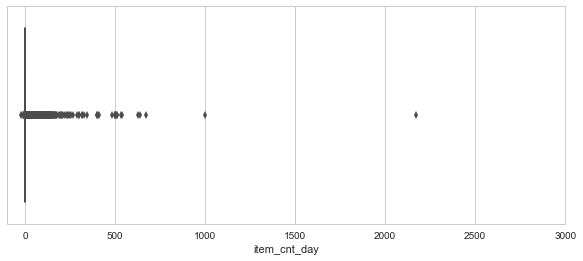

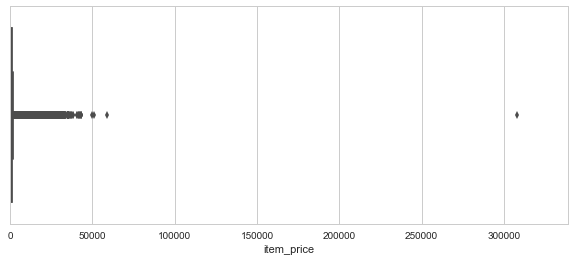

In [40]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=f_train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(f_train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=f_train.item_price)

In [44]:
print(len(f_train))
drop_outlier_train = f_train[f_train.item_price<100000]
drop_outlier_train = drop_outlier_train[drop_outlier_train.item_cnt_day<1001]
print(len(drop_outlier_train))

#output 
drop_outlier_train.head()

2935849
2935847


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [45]:
###  item_price below zero

In [47]:
drop_outlier_train[drop_outlier_train.item_price<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
212539,15.05.2013,4,32,2973,-1.0,1.0,"Москва ТЦ ""Серебряный Дом""","DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3


In [53]:
price_median = drop_outlier_train['item_price'].median()
drop_outlier_train.loc[drop_outlier_train.item_price<0, 'item_price'] = price_median
# verification
drop_outlier_train.loc[drop_outlier_train.item_price<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name


In [55]:
# why we have item_cnt_day < 0 data?

In [54]:
drop_outlier_train[drop_outlier_train.item_cnt_day<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
982,27.12.2013,11,59,5613,5571.00,-1.0,"Ярославль ТЦ ""Альтаир""",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1050,24.04.2015,27,22,5613,6090.00,-1.0,Москва Магазин С21,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1083,21.04.2015,27,18,5613,6090.00,-1.0,"Красноярск ТЦ ""Июнь""",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1122,06.09.2014,20,28,5613,6090.00,-1.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1129,17.02.2015,25,28,5613,6090.00,-1.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1130,28.08.2015,31,28,5613,5481.00,-2.0,"Москва ТЦ ""МЕГА Теплый Стан"" II",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1164,28.02.2014,13,29,5613,6090.00,-1.0,"Москва ТЦ ""Новый век"" (Новокосино)",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1195,05.08.2014,19,6,5613,5990.00,-1.0,"Воронеж (Плехановская, 13)",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1267,11.06.2015,29,12,5613,4198.00,-1.0,Интернет-магазин ЧС,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
1304,11.04.2015,27,31,5613,5481.00,-1.0,"Москва ТЦ ""Семеновский""",PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3
